# Middle East Conflict Analysis
## Isreal - Palestine 
### Free Palestine

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import autoreload
import os
import csv
import sys

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from collections import defaultdict, Counter

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [337]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Palestine-Israel conflict (2023-2024) ACLED\2023-10-01-2024-01-29-Middle_East-Israel-Palestine.csv")
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,ISR38822,19 January 2024,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,NaN,3,30,NaN,376,Middle East,Israel,HaZafon,Akko,Elon,Elon,33.0637,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,NaN,1705978255
1,ISR38830,19 January 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,60,NaN,376,Middle East,Israel,Haifa,Hadera,Alexander Mountain,Amikam,32.5635,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255
2,ISR38864,19 January 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Students (Israel),6,60,NaN,376,Middle East,Israel,HaMerkaz,Petah Tiqwa,Petah Tiqwa,Petah Tikva,32.0871,34.8875,1,Haaretz,National,"On 19 January 2024, dozens of high school stud...",0,crowd size=dozens,1705978256
3,ISR38867,19 January 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Women (Israel),6,60,NaN,376,Middle East,Israel,Tel Aviv,Tel Aviv,Tel Aviv,Tel Aviv,32.0809,34.7806,1,Haaretz,National,"On 19 January 2024, dozens of women and relati...",0,crowd size=dozens,1705978256
4,ISR38868,19 January 2024,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Israel (2022-),NaN,1,13,NaN,376,Middle East,Israel,Haifa,Haifa,Haifa,Haifa,32.8184,34.9885,2,Calcalist; Colbo News; Haaretz; Jerusalem Post...,Subnational-National,"Interception: On 19 January 2024, Israeli mili...",0,NaN,1705978256


### Statistical Representation

In [338]:
df.shape

(18090, 28)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18090 entries, 0 to 18089
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       18090 non-null  object 
 1   event_date          18090 non-null  object 
 2   year                18090 non-null  int64  
 3   time_precision      18090 non-null  int64  
 4   disorder_type       18090 non-null  object 
 5   event_type          18090 non-null  object 
 6   sub_event_type      18090 non-null  object 
 7   actor1              18090 non-null  object 
 8   assoc_actor_1       2515 non-null   object 
 9   inter1              18090 non-null  int64  
 10  interaction         18090 non-null  int64  
 11  civilian_targeting  6458 non-null   object 
 12  iso                 18090 non-null  int64  
 13  region              18090 non-null  object 
 14  country             18090 non-null  object 
 15  admin1              18090 non-null  object 
 16  admi

In [340]:
df.describe().round()

,year,time_precision,inter1,interaction,iso,latitude,longitude,geo_precision,fatalities,timestamp
count,18090.0,18090.0,18090.0,18090.0,18090.0,18090.0,18090.0,18090.0,18090.0,1.809000e+04
mean,2023.0,1.0,6.0,55.0,291.0,32.0,35.0,1.0,3.0,1.701853e+09
std,0.0,0.0,2.0,22.0,37.0,0.0,0.0,0.0,13.0,2.787690e+06
min,2023.0,1.0,1.0,10.0,275.0,30.0,34.0,1.0,0.0,1.696882e+09
25%,2023.0,1.0,3.0,38.0,275.0,31.0,34.0,1.0,0.0,1.699317e+09
50%,2023.0,1.0,7.0,58.0,275.0,32.0,35.0,1.0,0.0,1.701733e+09
75%,2023.0,1.0,8.0,78.0,275.0,32.0,35.0,2.0,0.0,1.704758e+09
max,2024.0,3.0,8.0,88.0,376.0,33.0,36.0,3.0,471.0,1.706035e+09


In [341]:
df.isnull().sum()

event_id_cnty             0
event_date                0
year                      0
time_precision            0
disorder_type             0
event_type                0
sub_event_type            0
actor1                    0
assoc_actor_1         15575
inter1                    0
interaction               0
civilian_targeting    11632
iso                       0
region                    0
country                   0
admin1                    0
admin2                   10
admin3                15235
location                  0
latitude                  0
longitude                 0
geo_precision             0
source                    0
source_scale              0
notes                     0
fatalities                0
tags                  13894
timestamp                 0
dtype: int64

### Data Cleaning and Manipulation

In [342]:
count_check = lambda x: x.value_counts() if x.count() > 100 else None
count_check(df['assoc_actor_1']).head(10)

assoc_actor_1
Refugees/IDPs (Palestine)                               544
Settlers (Israel)                                       506
Farmers (Palestine)                                     285
Rioters (Palestine)                                     118
Hamas Movement                                           76
PIJ: Palestinian Islamic Jihad                           72
Settlers (Israel); Military Forces of Israel (2022-)     67
Health Workers (Palestine)                               55
Muslim Group (Palestine)                                 54
Labor Group (Palestine)                                  51
Name: count, dtype: int64

In [343]:
most_freq_cols = ['assoc_actor_1', 'civilian_targeting', 'admin3', 'tags', 'admin2']
return_freqs = lambda x: x.mode()[0]

def fillna_with_mode(df, cols):
    for col in cols:
        df[col] = df[col].fillna(return_freqs(df[col]))
    return df

# Test the function
df = fillna_with_mode(df, most_freq_cols)


<Axes: >

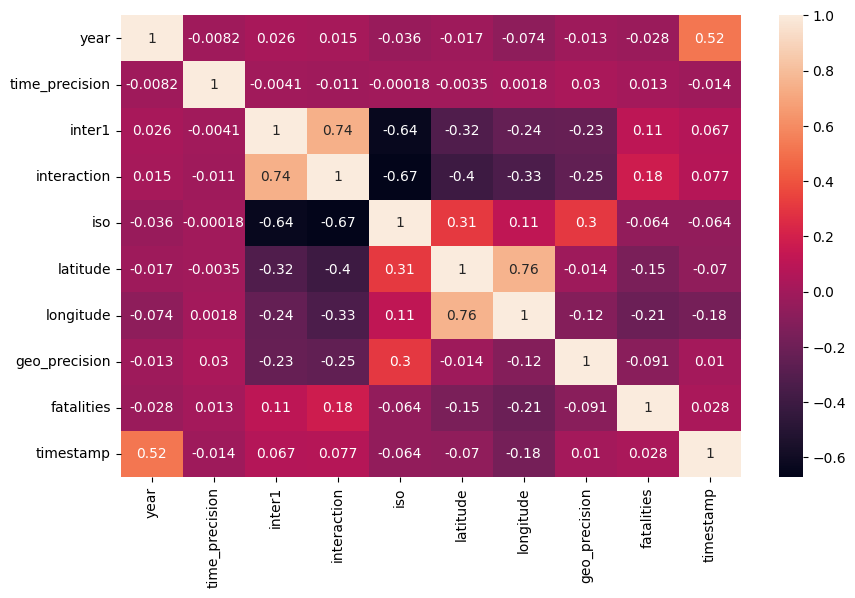

In [344]:
#compute correlation matrix for the numerical columns
def get_numeric_columns(df):
    numeric_columns = []
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Checking for integer or float data type
            numeric_columns.append(col)
    return numeric_columns

numeric_cols = get_numeric_columns(df)

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize = (10, 6))
sb.heatmap(corr_matrix, annot = True)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18090 entries, 0 to 18089
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       18090 non-null  object 
 1   event_date          18090 non-null  object 
 2   year                18090 non-null  int64  
 3   time_precision      18090 non-null  int64  
 4   disorder_type       18090 non-null  object 
 5   event_type          18090 non-null  object 
 6   sub_event_type      18090 non-null  object 
 7   actor1              18090 non-null  object 
 8   assoc_actor_1       18090 non-null  object 
 9   inter1              18090 non-null  int64  
 10  interaction         18090 non-null  int64  
 11  civilian_targeting  18090 non-null  object 
 12  iso                 18090 non-null  int64  
 13  region              18090 non-null  object 
 14  country             18090 non-null  object 
 15  admin1              18090 non-null  object 
 16  admi

### Exploratory Data Analysis (EDA)
- Explore the distribution of event types, sub-event types, and disorder types.- 
Analyze the distribution of fatalities over time and across different regions.- t
- Investigate trends in civilian targeting incidentss.

In [346]:
df.drop(columns = ['event_id_cnty'], inplace = True)

In [347]:
columns = ['event_type','sub_event_type', 'disorder_type']

In [348]:
df['event_type'].value_counts()

event_type
Explosions/Remote violence    7325
Riots                         3672
Battles                       2920
Strategic developments        2501
Violence against civilians    1150
Protests                       522
Name: count, dtype: int64

In [349]:
le = LabelEncoder()

def get_nums(df):
    for i in df[columns]:
        df[f"{i}{'_num'}"]  = le.fit_transform(df[i])
    return df

In [350]:
get_nums(df).head(2)

,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,event_type_num,sub_event_type_num,disorder_type_num
0,19 January 2024,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,Refugees/IDPs (Palestine),3,30,Civilian targeting,376,Middle East,Israel,HaZafon,Akko,Elon,Elon,33.0637,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,crowd size=no report,1705978255,1,18,1
1,19 January 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,60,Civilian targeting,376,Middle East,Israel,Haifa,Hadera,Alexander Mountain,Amikam,32.5635,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255,2,15,0


In [351]:
nums_cols = ['event_type_num', 'sub_event_type_num', 'disorder_type_num']

In [352]:
# for i in nums_cols:
#     sb.distplot(df[i].value_counts())

def plot_countplots(df):
    for col in df[nums_cols]:
        plt.figure(figsize=(6, 4))
        sb.distplot(df[col].dropna(), kde=True, bins=10)
        plt.title(f'Distribution plot for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

C:\Users\antonie\AppData\Local\Temp\ipykernel_8384\315941468.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




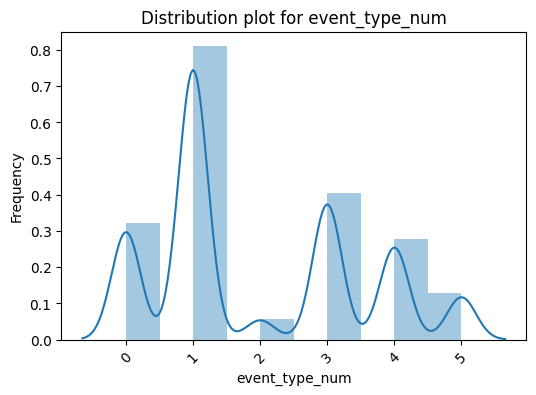

C:\Users\antonie\AppData\Local\Temp\ipykernel_8384\315941468.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




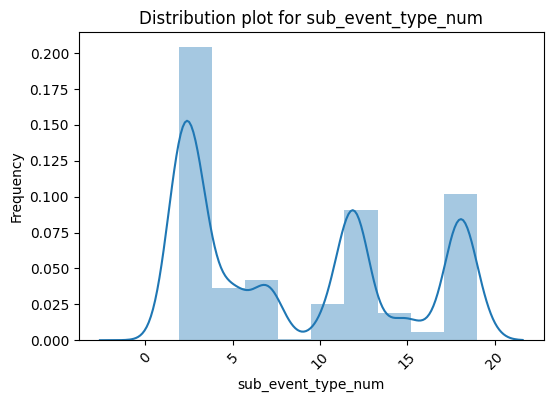

C:\Users\antonie\AppData\Local\Temp\ipykernel_8384\315941468.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




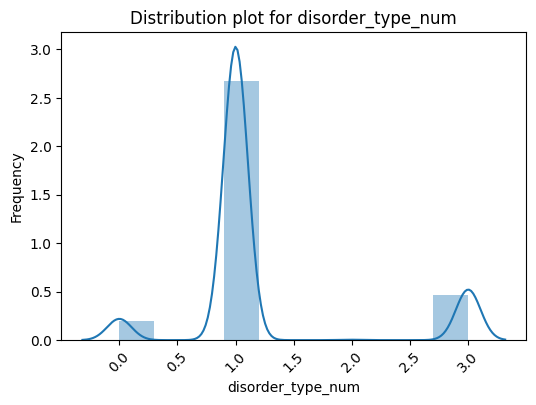

In [353]:
plot_countplots(df)

In [354]:
df.head(2)

,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,event_type_num,sub_event_type_num,disorder_type_num
0,19 January 2024,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,Refugees/IDPs (Palestine),3,30,Civilian targeting,376,Middle East,Israel,HaZafon,Akko,Elon,Elon,33.0637,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,crowd size=no report,1705978255,1,18,1
1,19 January 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,60,Civilian targeting,376,Middle East,Israel,Haifa,Hadera,Alexander Mountain,Amikam,32.5635,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255,2,15,0


In [355]:
df['event_date'] = pd.to_datetime(df['event_date'])
df.head(2)

,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,event_type_num,sub_event_type_num,disorder_type_num
0,2024-01-19,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,Refugees/IDPs (Palestine),3,30,Civilian targeting,376,Middle East,Israel,HaZafon,Akko,Elon,Elon,33.0637,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,crowd size=no report,1705978255,1,18,1
1,2024-01-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,60,Civilian targeting,376,Middle East,Israel,Haifa,Hadera,Alexander Mountain,Amikam,32.5635,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255,2,15,0


In [356]:
fatalities = df.groupby(['event_date', 'country', 'location', 'latitude', 'longitude'])
fatalities_df = fatalities['fatalities'].sum().to_frame().sort_values(by='fatalities', ascending = False)
fatalities_df

fatalities
event_date country   location          latitude longitude            
2023-10-17 Palestine Gaza - Az Zaytun  31.4964  34.4522           972
2023-10-07 Israel    Reim              31.3850  34.4590           768
2023-10-28 Palestine Gaza - Nasr       31.5340  34.4574           598
2023-11-18 Palestine Mukhayyam Jabalya 31.5360  34.4907           464
2023-11-20 Palestine Beit Lahiya       31.5541  34.5016           330
...                                                               ...
2023-11-04 Palestine Bayt Qad          32.4697  35.3563             0
                     Bayt Furik        32.1769  35.3354             0
                     Balata            32.2121  35.2856             0
                     Azzun             32.1750  35.0575             0
2024-01-19 Palestine Yuta              31.4459  35.0944             0

[7780 rows x 1 columns]

In [357]:
df2 = pd.DataFrame(fatalities_df)
df2.head()

,,,,,fatalities
event_date,country,location,latitude,longitude,
2023-10-17,Palestine,Gaza - Az Zaytun,31.4964,34.4522,972
2023-10-07,Israel,Reim,31.3850,34.4590,768
2023-10-28,Palestine,Gaza - Nasr,31.5340,34.4574,598
2023-11-18,Palestine,Mukhayyam Jabalya,31.5360,34.4907,464
2023-11-20,Palestine,Beit Lahiya,31.5541,34.5016,330


In [358]:
fatalities_df.columns

Index(['fatalities'], dtype='object')

In [359]:
df2.reset_index(inplace = True)

In [360]:
df2.head()

,event_date,country,location,latitude,longitude,fatalities
0,2023-10-17,Palestine,Gaza - Az Zaytun,31.4964,34.4522,972
1,2023-10-07,Israel,Reim,31.3850,34.4590,768
2,2023-10-28,Palestine,Gaza - Nasr,31.5340,34.4574,598
3,2023-11-18,Palestine,Mukhayyam Jabalya,31.5360,34.4907,464
4,2023-11-20,Palestine,Beit Lahiya,31.5541,34.5016,330


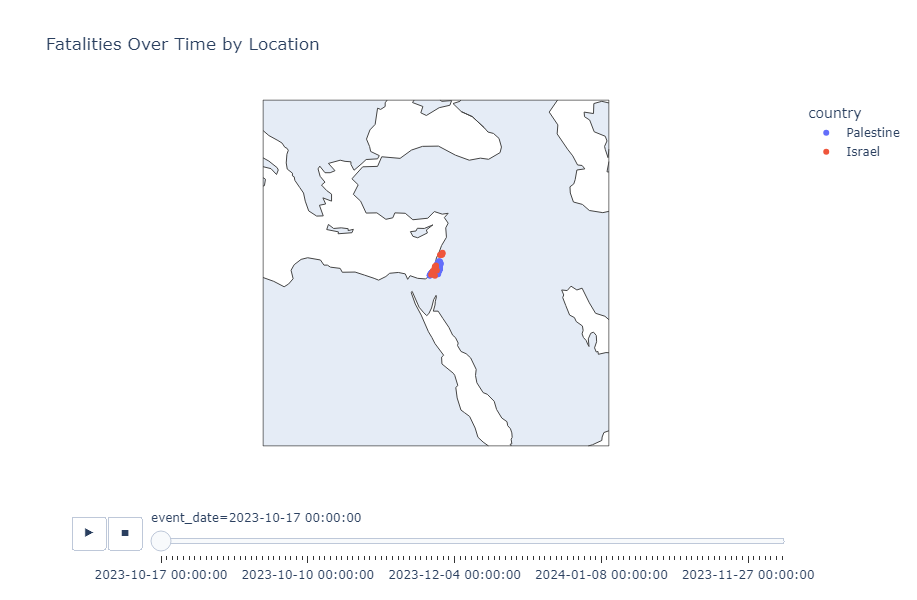

In [361]:
# Create an animated scatter plot
fig = px.scatter_geo(df2, 
                     lat='latitude',
                     lon='longitude',
                     locationmode='country names',
                     color="country",
                     hover_name="location",  
                     projection="mercator",
                     animation_frame="event_date",
                     size_max=50,  # Adjust the maximum marker size as needed
                     title='Fatalities Over Time by Location',
                    basemap_visible=True)

# Adjust the layout of the map
fig.update_layout(width=800, height=600)

# Set initial zoom level and center coordinates
fig.update_geos(
    projection_scale=10,  # Adjust the scale as needed for the initial zoom level
    center=dict(lat=31.5, lon=34.9)  # Adjust the latitude and longitude for the initial center
)

# Show the plot
fig.show()

In [362]:
df2.shape

(7780, 6)

In [363]:
location_fatalities = df2.groupby('location')
total_casualties = location_fatalities['fatalities'].sum().sum()
location_fatalities_pct = (location_fatalities['fatalities'].sum().to_frame().sort_values(by='fatalities', ascending = False) * 100)/total_casualties

In [364]:
round(location_fatalities_pct.head(20), 2)

,fatalities
location,
Mukhayyam Jabalya,7.09
Gaza - Az Zaytun,7.04
Rafah,5.89
Jabalya,5.89
An Nusayrat,5.65
Deir al Balah,4.49
Gaza - Shujaiyya,3.60
Al Burayj,3.42
Gaza - Nasr,3.35


In [365]:
df.head(2)

,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,event_type_num,sub_event_type_num,disorder_type_num
0,2024-01-19,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,Refugees/IDPs (Palestine),3,30,Civilian targeting,376,Middle East,Israel,HaZafon,Akko,Elon,Elon,33.0637,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,crowd size=no report,1705978255,1,18,1
1,2024-01-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,60,Civilian targeting,376,Middle East,Israel,Haifa,Hadera,Alexander Mountain,Amikam,32.5635,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255,2,15,0


## Temporal Analysis:

- Analyze the frequency of events over time (e.g., yearly, monthly).
- Identify seasonal patterns or trends in conflict events.

In [366]:
df3 = df[['event_date', 'disorder_type', 'event_type', 'sub_event_type']]

In [367]:
df3.set_index('event_date').head(5)

,disorder_type,event_type,sub_event_type
event_date,,,
2024-01-19,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack
2024-01-19,Demonstrations,Protests,Peaceful protest
2024-01-19,Demonstrations,Protests,Peaceful protest
2024-01-19,Demonstrations,Protests,Peaceful protest
2024-01-19,Strategic developments,Strategic developments,Disrupted weapons use


In [368]:
event = df3.groupby('event_date')
get_disorder = event['disorder_type'].value_counts().to_frame().sort_values(by='count', ascending = False)
get_disorder.rename(columns = {'count':'events_freq'}, inplace = True)

In [369]:
get_disorder.reset_index(inplace = True)
get_disorder.head()

,event_date,disorder_type,events_freq
0,2023-10-09,Political violence,325
1,2023-10-07,Political violence,286
2,2023-11-02,Political violence,241
3,2023-10-08,Political violence,220
4,2023-10-27,Political violence,215


In [370]:
get_disorder.set_index('event_date', inplace = True)

<Axes: title={'center': 'Disorder Frequency over time'}, xlabel='event_date'>

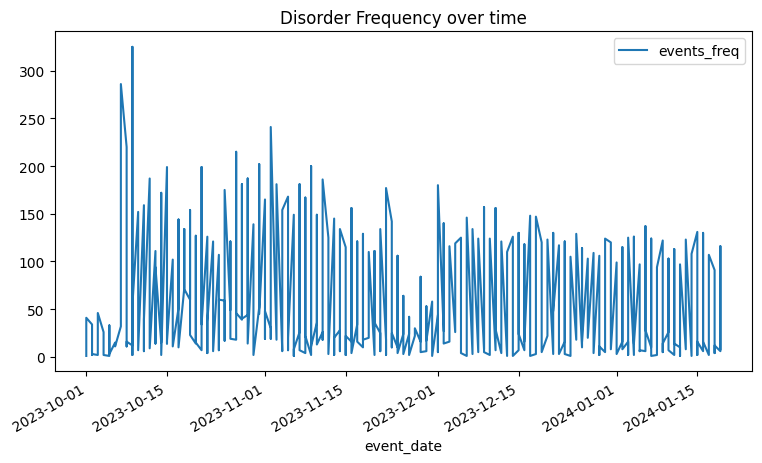

In [371]:
get_disorder.plot(title = 'Disorder Frequency over time', figsize=(9, 5))

## Anomaly Detection:

- Identify anomalous or unusual events in the dataset using anomaly detection algorithms.
- Investigate the causes and implications of anomalous events within the context of the conflict

Anomaly (or outlier) detection is the data-driven task of identifying these rare occurrences and filtering or modulating them from the analysis pipeline. Such anomalous events can be connected to some fault in the data source, such as financial fraud, equipment fault, or irregularities in time series analysis

DBSCAN or Density-based spatial clustering of applications with noise is a density-based clustering machine learning algorithm to cluster normal data and detect outliers in an unsupervised manner.

In [372]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [373]:
df.head(2)

,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,event_type_num,sub_event_type_num,disorder_type_num
0,2024-01-19,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,Refugees/IDPs (Palestine),3,30,Civilian targeting,376,Middle East,Israel,HaZafon,Akko,Elon,Elon,33.0637,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,crowd size=no report,1705978255,1,18,1
1,2024-01-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,60,Civilian targeting,376,Middle East,Israel,Haifa,Hadera,Alexander Mountain,Amikam,32.5635,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255,2,15,0


In [374]:
outliers_df = df.copy()
outliers_df = outliers_df.select_dtypes(include=['int'])
outliers_df.head()

,year,time_precision,inter1,interaction,iso,geo_precision,fatalities,timestamp,event_type_num,sub_event_type_num,disorder_type_num
0,2024,1,3,30,376,2,0,1705978255,1,18,1
1,2024,1,6,60,376,1,0,1705978255,2,15,0
2,2024,1,6,60,376,1,0,1705978256,2,15,0
3,2024,1,6,60,376,1,0,1705978256,2,15,0
4,2024,1,1,13,376,2,0,1705978256,4,7,3


In [375]:
outliers_df.isnull().sum()

year                  0
time_precision        0
inter1                0
interaction           0
iso                   0
geo_precision         0
fatalities            0
timestamp             0
event_type_num        0
sub_event_type_num    0
disorder_type_num     0
dtype: int64

In [376]:
ss = StandardScaler()

scaler_df = ss.fit_transform(outliers_df)
outliers_norm = pd.DataFrame(normalize(scaler_df))


In [377]:
pca = PCA()

principle_df = pca.fit_transform(outliers_norm)
principle_df = pd.DataFrame(principle_df)
principle_df.columns=['year', 'time_precision', 'inter1', 'interaction', 'iso', 'geo_precision', 'fatalities', 'timestamp', 'event_type_num', 'sub_event_type_num', 'disorder_type_num']

principle_df.head()

,year,time_precision,inter1,interaction,iso,geo_precision,fatalities,timestamp,event_type_num,sub_event_type_num,disorder_type_num
0,0.704754,-0.478957,-0.462124,0.017157,-0.286393,0.281762,0.115760,-0.186176,0.154159,-0.119251,-0.006164
1,0.215959,-0.248604,-0.558235,-0.274729,-0.289873,0.368512,0.139816,-0.283360,0.440577,-0.276089,-0.002840
2,0.215959,-0.248604,-0.558235,-0.274729,-0.289873,0.368512,0.139816,-0.283360,0.440577,-0.276089,-0.002840
3,0.215959,-0.248604,-0.558235,-0.274729,-0.289873,0.368512,0.139816,-0.283360,0.440577,-0.276089,-0.002840
4,0.850327,-0.483468,-0.269712,-0.169327,0.353613,0.201873,0.056881,-0.057885,0.001635,-0.042640,-0.006252


In [378]:
db_model = DBSCAN(eps=0.05, min_samples=10)
db_model.fit(principle_df)
labels = db_model.labels_

In [379]:
labels

array([  0,   1,   1, ..., 396,  -1,  -1], dtype=int64)

In [380]:
np.histogram(labels, bins=np.unique(labels))

(array([3705,   38,   23,   55,   55,   12,   12,   56,   56,   84,   41,
          23,   27,   27,   53,   56,   72,   60,   12,   15,   31,   31,
          28,   28,   12,   15,   14,   14,   15,   11,   11,   12,   12,
          69,   69,   38,   38,   11,   11,   18,   18,   18,   13,   67,
          51,   52,   42,   16,   16,   12,   16,   16,   14,   14,   48,
          48,   15,   15,   40,   32,   35,   36,   27,   26,   19,   16,
          95,   95,   51,   48,  206,  206,  200,  137,   19,   19,   53,
          31,  127,  147,   80,   80,   33,   33,   46,   46,  192,  183,
          10,   10,   14,   13,   15,   14,   32,   32,   87,   45,   50,
          24,   33,   33,   40,   18,   19,   19,   19,   30,   30,   10,
          19,   19,   11,   11,   10,   10,   34,   13,   13,   20,   25,
          11,   11,   16,   11,   11,   11,   11,   10,   10,   12,   12,
          27,   25,   34,   13,   19,  428,  424,   71,   71,   32,   32,
          13,   13,   44,   31,   44, 

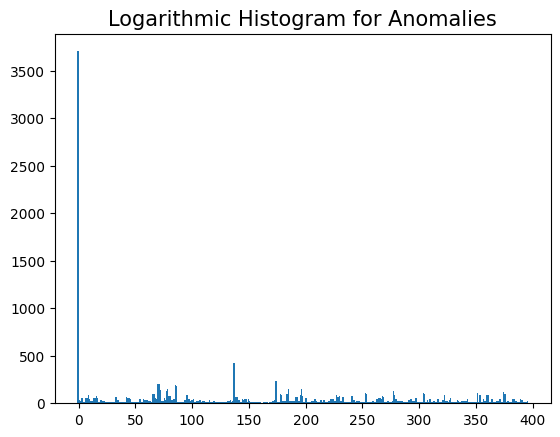

Clusters: 397
Anomalise: 3705


In [381]:
plt.hist(x = labels, bins = np.unique(labels))
plt.title('Logarithmic Histogram for Anomalies', fontdict={'fontsize':15})
plt.show()

n_cluster = len(np.unique(labels))-1
anomalise = list(labels).count(-1)
print(f'Clusters: {n_cluster}')
print(f'Anomalise: {anomalise}')

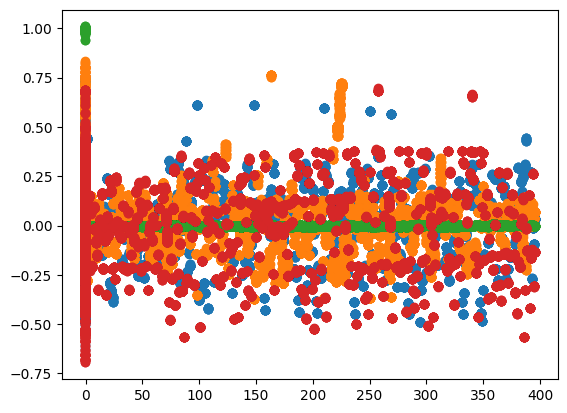

In [382]:
plt.scatter(labels, principle_df['event_type_num'])
plt.scatter(labels, principle_df['sub_event_type_num'])
plt.scatter(labels, principle_df['disorder_type_num'])
plt.scatter(labels, principle_df['fatalities'])
plt.legend=True

In [383]:
np.unique(labels)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [384]:
df['fatalities'].dtypes

dtype('int64')

In [385]:
df.head(2)

,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,event_type_num,sub_event_type_num,disorder_type_num
0,2024-01-19,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,Refugees/IDPs (Palestine),3,30,Civilian targeting,376,Middle East,Israel,HaZafon,Akko,Elon,Elon,33.0637,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,crowd size=no report,1705978255,1,18,1
1,2024-01-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,60,Civilian targeting,376,Middle East,Israel,Haifa,Hadera,Alexander Mountain,Amikam,32.5635,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255,2,15,0


## Feature Engineering:

- Engineer additional features based on existing columns (e.g., extract day of the week, month, or year from event_date).
- Create binary or categorical variables to represent different conflict characteristics or event types.

In [386]:
df.head(2)

,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,event_type_num,sub_event_type_num,disorder_type_num
0,2024-01-19,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,Refugees/IDPs (Palestine),3,30,Civilian targeting,376,Middle East,Israel,HaZafon,Akko,Elon,Elon,33.0637,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,crowd size=no report,1705978255,1,18,1
1,2024-01-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,60,Civilian targeting,376,Middle East,Israel,Haifa,Hadera,Alexander Mountain,Amikam,32.5635,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255,2,15,0


In [387]:
df['day'] = df['event_date'].dt.day_name()
df['month'] = df['event_date'].dt.month_name()
df['year'] = df['event_date'].dt.year

In [388]:
df.head(2)

,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,event_type_num,sub_event_type_num,disorder_type_num,day,month
0,2024-01-19,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,Refugees/IDPs (Palestine),3,30,Civilian targeting,376,Middle East,Israel,HaZafon,Akko,Elon,Elon,33.0637,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,crowd size=no report,1705978255,1,18,1,Friday,January
1,2024-01-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,60,Civilian targeting,376,Middle East,Israel,Haifa,Hadera,Alexander Mountain,Amikam,32.5635,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255,2,15,0,Friday,January


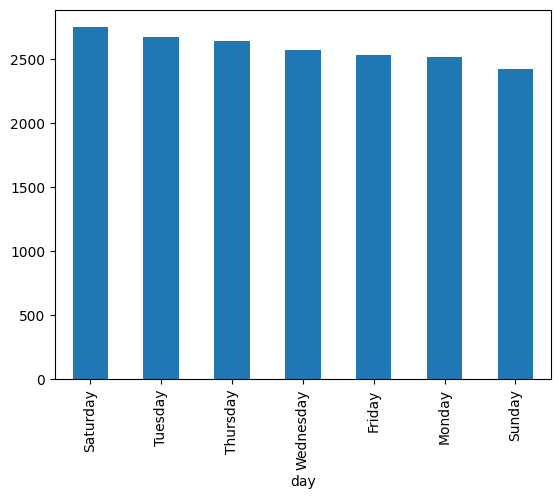

In [389]:
day_counts = df['day'].value_counts().plot(kind = 'bar')
# plt.bar(day_counts.)

## Predictive Modeling:

- Build predictive models to forecast the occurrence of conflict events based on historical data.
- Predict the severity of conflict events (e.g., number of fatalities) using regression models.

In [390]:
df.head(2)

,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,event_type_num,sub_event_type_num,disorder_type_num,day,month
0,2024-01-19,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,Refugees/IDPs (Palestine),3,30,Civilian targeting,376,Middle East,Israel,HaZafon,Akko,Elon,Elon,33.0637,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,crowd size=no report,1705978255,1,18,1,Friday,January
1,2024-01-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,60,Civilian targeting,376,Middle East,Israel,Haifa,Hadera,Alexander Mountain,Amikam,32.5635,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255,2,15,0,Friday,January


In [391]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [405]:
df4 = df.copy()
df4.drop(columns = ['event_date'], inplace = True)

# x = df4.drop(columns = ['event_type_num'])

x = df4[['event_type_num', 'interaction']]
y = df4['fatalities']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=4)

dtc = DecisionTreeClassifier()

dtc_model = dtc.fit(x_train, y_train)

disorder_predictions = dtc_model.predict(x_train)

In [408]:
print(disorder_predictions)

[0 0 0 ... 0 0 0]
